In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

# Models to be tested
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost.sklearn import XGBClassifier

# Cross-validation/gridserch tools
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Pipiline tools
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Deal with outliers
from sklearn.preprocessing import RobustScaler



import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore sklearn/seaborn deprecation warning 

In [35]:
df= pd.read_csv('./dataset/users.csv')

df.set_index('id', inplace=True) #set id as df index

# New feature ratio_outcome_income
df['ratio_outcome_income']= df['monthly_income']/df['monthly_outcome']

In [92]:
# Split target feature

X = df.drop(labels = ["class"],axis = 1)
y = df['class']


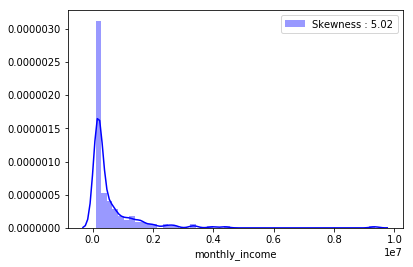

In [91]:
# The features does not follow a normal distrubtion, 
# i.e. wealth is not normally distributed.
# Hence below we first focus on models that do not make such assumption. 
temp=df[(df['monthly_income'] >100000) ]['monthly_income']

sns.distplot(temp, color="b", label="Skewness : %.2f"%(temp.skew())).legend(loc="best")


In [86]:
robustscaled_X

array([[ 4.3365762 ,  2.5486641 ,  0.45178641],
       [-0.06417566, -0.24992221,  6.13433305],
       [-0.01960005, -0.20297878,  1.49025368],
       ...,
       [-0.09101746,  0.34548098, -0.40829521],
       [ 4.35954264,  2.8273524 ,  0.36678957],
       [ 2.7856808 ,  3.66873023, -0.07278814]])

In [45]:
# Create rules to create the cross validations datasets that are shuffled. 
# The ScikitLearn Cross validation method also creates datasets,
# but as far as I'm aware it does not have the shuffle option.
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)